In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding
data = pd.read_csv('spam.csv',encoding='latin-1')

In [2]:
import pandas as pd
from imblearn.over_sampling import RandomOverSampler
data = pd.read_csv('spam.csv')
X = data['Message'].values
y = data['Category'].values
oversampler = RandomOverSampler(sampling_strategy='minority', random_state=42)
X_resampled, y_resampled = oversampler.fit_resample(X.reshape(-1, 1), y)
balanced_data = pd.DataFrame({'Message': X_resampled.flatten(), 'Category': y_resampled})

class_distribution = balanced_data['Category'].value_counts()
print("Class Distribution after Resampling:")
print(class_distribution)

balanced_data.to_csv('sp.csv', index=False)

data = pd.read_csv('sp.csv',encoding='latin-1')

Class Distribution after Resampling:
Category
ham     4825
spam    4825
Name: count, dtype: int64


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\acer\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


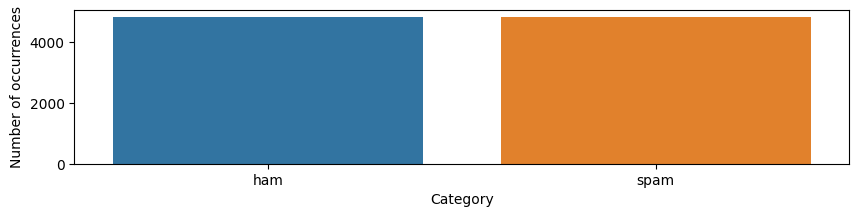

In [3]:
from sklearn.preprocessing import LabelEncoder
import nltk 
from nltk.tokenize import word_tokenize
# train test split
from sklearn.model_selection import train_test_split
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words=set(stopwords.words('english'))
cnt=data['Category'].value_counts()
plt.figure(figsize=(10,2))
sns.barplot(x=cnt.index, y=cnt.values)
plt.ylabel('Number of occurrences')
plt.xlabel('Category')
plt.show()

msg=data['Message'].values 
label=data['Category'].values


enco=LabelEncoder()
label= enco.fit_transform(label)
def preprocess (text):
    tokens=word_tokenize(text)

In [4]:
msg=data['Message'].values
label=data['Category'].values
enco=LabelEncoder()
label= enco.fit_transform(label)
stop_word=set(stopwords.words('english'))
def preprocess(text):
    tokens=word_tokenize(text)
    token = [word.lower() for word in tokens if word.isalpha() and word.lower() not in stop_words]
    return " ".join(tokens)
msg= [preprocess (message) for message in msg]
print(msg)
x_train,x_test,y_train,y_test=train_test_split(msg, label, test_size=0.2,stratify=label, random_state=1)

['Go until jurong point , crazy .. Available only in bugis n great world la e buffet ... Cine there got amore wat ...', 'Ok lar ... Joking wif u oni ...', "Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005 . Text FA to 87121 to receive entry question ( std txt rate ) T & C 's apply 08452810075over18 's", 'U dun say so early hor ... U c already then say ...', "Nah I do n't think he goes to usf , he lives around here though", "FreeMsg Hey there darling it 's been 3 week 's now and no word back ! I 'd like some fun you up for it still ? Tb ok ! XxX std chgs to send , ï¿½1.50 to rcv", 'Even my brother is not like to speak with me . They treat me like aids patent .', "As per your request 'Melle Melle ( Oru Minnaminunginte Nurungu Vettam ) ' has been set as your callertune for all Callers . Press * 9 to copy your friends Callertune", 'WINNER ! ! As a valued network customer you have been selected to receivea ï¿½900 prize reward ! To claim call 09061701461 . Claim code KL341 

In [5]:
max_cnt = 10000

# Tokenization
tokenizer=Tokenizer(num_words=max_cnt)
tokenizer.fit_on_texts(x_train)

x_train_seq = tokenizer.texts_to_sequences(x_train)
x_test_seq = tokenizer.texts_to_sequences(x_test)
print(x_test_seq)
maxlen = 100
x_train_pad =pad_sequences(x_train_seq, maxlen=maxlen, padding='post', truncating='post')
x_test_pad =pad_sequences(x_test_seq, maxlen=maxlen, padding='post', truncating='post')


[[28, 819, 183, 575, 13, 4894, 88, 282, 13, 1568, 614, 47, 10, 39, 95], [19, 53, 377, 10, 403, 209, 253, 1, 524, 19, 53, 16, 11, 49, 67, 1, 228, 43, 60, 76, 615, 621, 430, 316, 317, 300, 409], [80, 2, 467, 2496, 18, 756, 257], [3432, 1262, 423, 10, 651, 2, 1, 42, 153, 285, 38, 140, 2227, 15, 40, 2227, 110, 153, 46, 126, 410, 7, 3433, 30, 49, 30, 558, 1, 652], [4, 105, 1, 134, 6966, 4424, 2188, 16, 113, 197, 7, 44, 14, 189, 13, 214, 25, 1964, 428, 4, 1169, 7, 189, 13, 846, 3758, 4738, 44, 375, 7, 2084, 2205, 3409, 1112], [4, 804, 1527, 153, 29, 77, 1, 111, 1463, 7], [68, 3, 356, 1235, 20, 838, 22, 3, 451, 20, 19, 1080, 323, 207, 512, 45, 208, 210, 145, 21, 263, 1, 436, 504, 112, 46, 658, 87, 1539, 1540], [40, 70, 58, 84, 22, 19, 193, 120, 61, 34, 21, 2477, 1, 1860, 180, 84, 14, 44, 32, 1301, 11, 12, 148, 19, 413, 60, 84, 90, 38, 871, 1302], [197, 274, 97, 7, 189, 13, 136, 163, 709, 22, 252], [1648, 147, 23, 3, 611, 2883, 308, 417, 22, 19, 81, 395, 353, 81, 59], [6, 320, 1104, 10, 4627, 

In [6]:
# synthetic minority oversampling technique
# from imblearn.over_sampling import SMOTE
# smote=SMOTE(sampling_strategy='auto')
# x_train_smote,y_train_smote=smote.fit_resample(x_train_pad,y_train)

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dropout, Dense
from tensorflow.keras.optimizers import Adam
seq_len=100
model = Sequential()
model.add(Embedding(input_dim=max_cnt, output_dim=128, input_length=seq_len))
model.add(LSTM(128, dropout=0.2, return_sequences=True))
model.add(LSTM(64, dropout=0.2))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

# Compiling the model
model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])
model.save('lstm_model.h5')
# Training the model
model.fit(x_train_pad,y_train, validation_data=(x_test_pad, y_test), epochs=20, batch_size=32)
model.save('lstm_model.h5')

c:\Users\acer\Desktop\nlp\venv\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 1/20
242/242 [==============================] - 41s 151ms/step - loss: 0.6946 - accuracy: 0.4920 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/20
242/242 [==============================] - 34s 139ms/step - loss: 0.6938 - accuracy: 0.5004 - val_loss: 0.6933 - val_accuracy: 0.5000
Epoch 3/20
242/242 [==============================] - 33s 136ms/step - loss: 0.6939 - accuracy: 0.4908 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/20
242/242 [==============================] - 34s 139ms/step - loss: 0.6937 - accuracy: 0.5013 - val_loss: 0.6937 - val_accuracy: 0.5000
Epoch 5/20
242/242 [==============================] - 35s 145ms/step - loss: 0.6937 - accuracy: 0.4990 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 6/20
242/242 [==============================] - 35s 143ms/step - loss: 0.6936 - accuracy: 0.4898 - val_loss: 0.6933 - val_accuracy: 0.5000
Epoch 7/20
242/242 [==============================] - 35s 144ms/step - loss: 0.5066 - accuracy: 0.6981 - val_loss: 0.1074 - val_ac

In [8]:
import numpy as np
y_pred=model.predict(x_test_pad)
y_pred=np.round(y_pred)
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

61/61 [==============================] - 3s 42ms/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       965
           1       1.00      1.00      1.00       965

    accuracy                           1.00      1930
   macro avg       1.00      1.00      1.00      1930
weighted avg       1.00      1.00      1.00      1930

[[963   2]
 [  0 965]]
